In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

roteadores = ['Router1', 'Router2', 'Router3', 'Router4', 'Router5', 'Router6', 'Router7']

dataframe = pd.read_fwf('../Estatisticas'+'/data.txt',header=None,
names=["Router1", "Router2", "Router3", "Router4","Router5","Router6",
"Router7", "Room"])

In [20]:
def normaliza(dataframe):
    media = dataframe.mean()
    dp = dataframe.std()
    
    x = np.linspace(dataframe.min(), dataframe.max())
    y = stats.norm.pdf(x, media, dp)
    
    plt.plot(x, y)

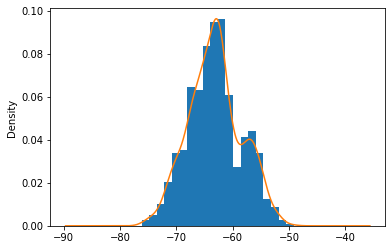

In [21]:
M = 0

for item in roteadores:
    M = M + dataframe.loc[:, item]

M = M/7
M.hist(bins=20, density=True)
M.plot.density()
plt.show()

In [23]:
ro = 0.7
mi1 = -64
mi2 = -57
sigma1 = 2.9
sigma2 = 2.3

def fdp(x):
     return (ro*(1/(sigma1*math.sqrt(2*math.pi)))*math.exp(-0.5*math.pow(((x-mi1)/sigma1), 2))+((1-ro)*(1/(sigma2*math.sqrt(2*math.pi)))*math.exp(-0.5*math.pow(((x-mi2)/sigma2), 2))))
fdp = np.vectorize(fdp)

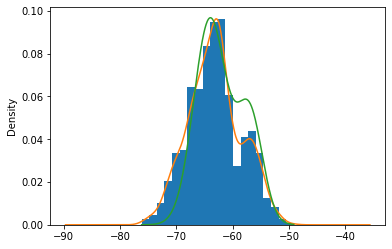

In [25]:
x = np.linspace(M.min(), M.max(), 400)
M.hist(bins=20, density=1)
M.plot.density() 
plt.plot(x,fdp(x)) 